In [1]:
# Importação de bibliotecas
import pandas as pd
from pycaret.classification import *  # inicializa o ambiente PyCaret para classificação

In [2]:
# Carrega os dados em um DataFrame pandas
mushroom_df = pd.read_csv('../doc/mushrooms.csv', sep=',')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
target_col = 'class'  # define a coluna alvo (variável resposta)

# Configuração do ambiente PyCaret:
s = setup(
    data=mushroom_df,
    target=target_col,
    session_id=1,                        # define uma semente fixa
    feature_selection=True,              # ativa a seleção automática de variáveis
    feature_selection_method='classic',  # utiliza o método padrão de seleção
    remove_multicollinearity=True,       # remove variáveis altamente correlacionadas
    multicollinearity_threshold=0.9,     # corte de correlação (0.9 é o padrão)
    low_variance_threshold=0.05          # remove features de baixa variância (colunas com valores constantes)
)

,Description,Value
0,Session id,1
1,Target,class
2,Target type,Binary
3,Target mapping,"e: 0, p: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(8124, 5)"
6,Transformed train set shape,"(5686, 5)"
7,Transformed test set shape,"(2438, 5)"
8,Categorical features,22
9,Preprocess,True


In [4]:
# Carrega um modelo já salvo
loaded_model = load_model('../doc/resultados/modelo_classificacao_cogumelos')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\am_cy\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        cri

In [13]:
# Quando o modelo foi treinado, os rótulos de texto foram convertidos para valores numéricos.
# O scikit-learn faz isso automaticamente ordenando em ordem alfabética: classes_ = ['e', 'p']
# classe 0 → 'e' → comestível
# classe 1 → 'p' → venenoso
print(mushroom_df[target_col].value_counts())

# Exibe as classes do modelo na ordem [0 1]
print(loaded_model.classes_)


class
e    4208
p    3916
Name: count, dtype: int64
[0 1]


In [5]:
# A função "predict_model()" retorna "prediction_label" (classe prevista) e "prediction_score" (probabilidade da classe prevista).
# Se "data=None", as previsões e métricas são feitas no conjunto de teste criado no setup (necessário rodá-lo na mesma execução).
# Também é possível passar um novo dataset em "data" para prever nele.
# "raw_score=True" mostra a probabilidade de todas as classes.
# Obs.: "prediction_score" indica a probabilidade da classe prevista (não necessariamente da classe positiva).
# Ex.: se "prediction_label=0" e "prediction_score=0.90" → 90% de chance de ser classe 0.

predictions = predict_model(loaded_model, data=mushroom_df, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7639,0.8378,0.7639,0.8058,0.7576,0.5333,0.5708


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score_e,prediction_score_p
0,x,s,n,t,p,f,c,n,k,e,...,w,o,p,k,s,u,p,p,0.4847,0.5153
1,x,s,y,t,a,f,c,b,k,e,...,w,o,p,n,n,g,e,p,0.4847,0.5153
2,b,s,w,t,l,f,c,b,n,e,...,w,o,p,n,n,m,e,p,0.4847,0.5153
3,x,y,w,t,p,f,c,n,n,e,...,w,o,p,k,s,u,p,e,0.9054,0.0946
4,x,s,g,f,n,f,w,b,k,t,...,w,o,e,n,a,g,e,p,0.3935,0.6065


In [6]:
# Função com "data=None"
predict_model(loaded_model, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7494,0.8272,0.7494,0.7928,0.7421,0.5048,0.5435


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score_e,prediction_score_p
1817,f,s,n,f,n,f,w,b,k,t,...,w,o,e,n,a,g,e,p,0.3935,0.6065
2512,x,s,w,f,c,f,w,n,p,e,...,w,o,p,n,s,d,p,p,0.3935,0.6065
2543,x,f,g,t,n,f,c,b,u,t,...,w,o,p,n,v,d,e,e,0.9054,0.0946
280,x,y,w,t,p,f,c,n,w,e,...,w,o,p,n,s,g,p,e,0.8835,0.1165
5532,f,y,y,f,f,f,c,b,g,e,...,w,o,l,h,v,d,p,p,0.2516,0.7484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,f,s,w,t,f,f,c,b,h,t,...,w,o,p,h,s,g,p,p,0.4847,0.5153
6001,f,s,e,f,s,f,c,n,b,t,...,w,o,e,w,v,d,p,p,0.3935,0.6065
5449,f,s,w,t,f,f,c,b,p,t,...,w,o,p,h,s,g,p,p,0.4847,0.5153
772,x,y,y,t,a,f,c,b,k,e,...,w,o,p,k,n,m,e,e,0.9054,0.0946


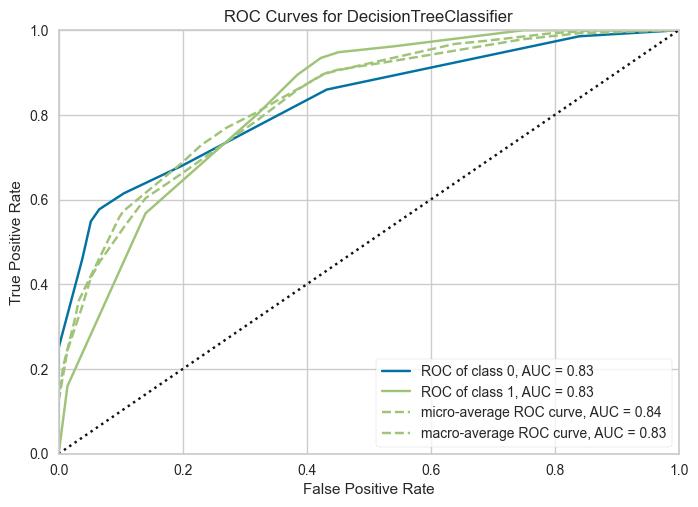

In [ ]:
plot_model(loaded_model, plot = 'auc')

# Eixo X (False Positive Rate) → proporção de negativos (comestíveis) classificados como positivos (venenosos).
# Eixo Y (True Positive Rate ou Recall) → proporção de positivos (venenosos) detectados corretamente.
# A linha preta diagonal (y=x) é o "chute aleatório" (AUC = 0.5).
# Quanto mais a curva se afasta para o canto superior esquerdo, melhor o modelo.
# Um AUC = 0.83 significa que o modelo tem 83% de chance de distinguir corretamente entre um cogumelo venenoso e um comestível escolhidos aleatoriamente.

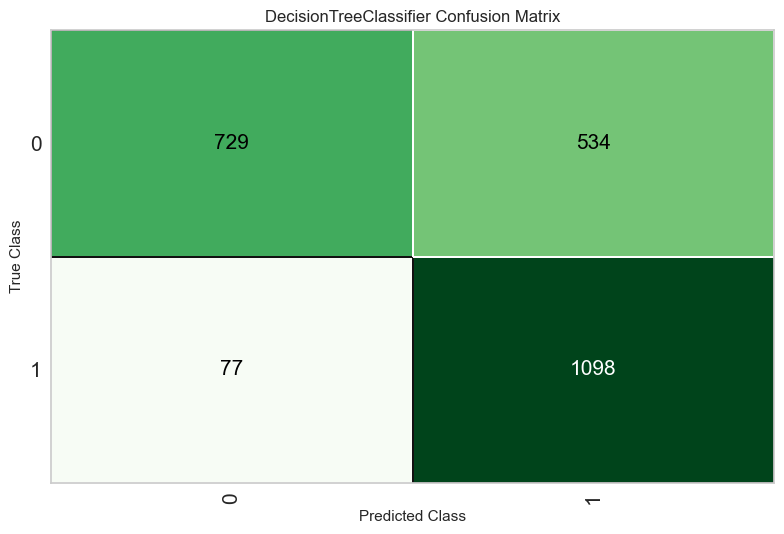

In [8]:
plot_model(loaded_model, plot = 'confusion_matrix')